In [2]:
import ctapipe
from ctapipe.utils.datasets import get_dataset_path
from ctapipe.io import EventSource, EventSeeker
from ctapipe.visualization import CameraDisplay
from ctapipe.instrument import CameraGeometry
from matplotlib import pyplot as plt
from astropy import units as u
import numpy as np
%matplotlib inline
plt.style.use("ggplot")

In [3]:
print(ctapipe.__version__)
print(ctapipe.__file__)

0.9.1
/home/andrii/work/cnn/ctasoft/ctapipe/ctapipe/__init__.py


In [14]:
path = '/mnt/yggdrasil_data/prod5/mono-lst-pmt-pmma-nominal/nsb_0.24586/Cherenkov/light_emission/output/ff-1m_r_6nphot_1000000000_dist_500_radius_150_Cherenkov_event.simtel.gz'

In [16]:
filename = path
source = EventSource(filename, max_events=2)

for event in source:
    print(event.index.event_id)

100
200


In [17]:
filename

'/mnt/yggdrasil_data/prod5/mono-lst-pmt-pmma-nominal/nsb_0.24586/Cherenkov/light_emission/output/ff-1m_r_6nphot_1000000000_dist_500_radius_150_Cherenkov_event.simtel.gz'

In [18]:
source

In [19]:
event

ctapipe.containers.ArrayEventContainer:
                       index.*: event indexing information
                          r0.*: Raw Data
                          r1.*: R1 Calibrated Data
                         dl0.*: DL0 Data Volume Reduced Data
                         dl1.*: DL1 Calibrated image
                         dl2.*: Reconstructed Shower Information
                  simulation.*: Simulated Event Information
                     trigger.*: central trigger information
                         count: number of events processed
                    pointing.*: Array and telescope pointing positions
                 calibration.*: Container for calibration coefficients for the
                                current event
                         mon.*: container for event-wise monitoring data (MON)

In [20]:
print(event.r1)

{'tel': {1: {'selected_gain_channel': array([1, 1, 1, ..., 1, 1, 1], dtype=int8),
             'waveform': array([[-0.1988541 , -2.76671   , -1.3660614 , ..., -7.6689806 ,
        -7.4355392 ,  0.03458735],
       [ 2.0933738 ,  0.59514874, -2.4013014 , ..., -5.0231953 ,
        -7.8323674 , -0.52852005],
       [ 1.2758619 ,  0.6444376 ,  1.2758619 , ..., -8.616451  ,
        -5.248855  ,  0.43396285],
       ...,
       [-2.1065624 , -0.6713444 ,  1.7890295 , ..., -8.257497  ,
        -3.1317182 , -1.6965002 ],
       [-2.083848  ,  0.7361272 , -1.8669268 , ..., -4.4699807 ,
        -8.15764   , -6.20535   ],
       [-0.6062276 ,  2.069836  , -0.6062276 , ..., -8.188407  ,
        -5.2893386 ,  1.1778147 ]], dtype=float32)}}}


In [21]:
from ctapipe.calib import CameraCalibrator

calib = CameraCalibrator(subarray=source.subarray)
calib(event)

In [22]:
for tel_id in event.dl1.tel:
    print("TEL{:03}: {}".format(tel_id, source.subarray.tel[tel_id]))
    print("  - r0  wave shape  : {}".format(event.r0.tel[tel_id].waveform.shape))
    print("  - r1  wave shape  : {}".format(event.r1.tel[tel_id].waveform.shape))
    print("  - dl1 image shape : {}".format(event.dl1.tel[tel_id].image.shape))


TEL001: LST_LST_LSTCam
  - r0  wave shape  : (2, 1855, 40)
  - r1  wave shape  : (1855, 40)
  - dl1 image shape : (1855,)


In [30]:
len(event.r0.tel[tel_id].waveform)

2

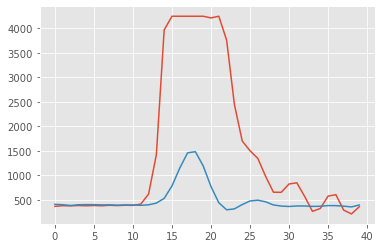

In [32]:
plt.plot(np.arange(0,40,1), event.r0.tel[tel_id].waveform[0,1])
plt.plot(np.arange(0,40,1), event.r0.tel[tel_id].waveform[1,1])

In [ ]:
from ctapipe.visualization import CameraDisplay
tel_id = sorted(event.r1.tel.keys())[1]
sub = source.subarray
geometry = sub.tel[tel_id].camera.geometry
image = event.dl1.tel[tel_id].image

In [5]:
source = EventSource(path, max_events=4)

for event in source:
    print(event.count, event.index.event_id, event.simulation.shower.energy)

0 100 9.999999960041972e-13 TeV
1 200 9.999999960041972e-13 TeV
2 300 9.999999960041972e-13 TeV
3 400 9.999999960041972e-13 TeV


In [6]:
event

ctapipe.containers.ArrayEventContainer:
                       index.*: event indexing information
                          r0.*: Raw Data
                          r1.*: R1 Calibrated Data
                         dl0.*: DL0 Data Volume Reduced Data
                         dl1.*: DL1 Calibrated image
                         dl2.*: Reconstructed Shower Information
                  simulation.*: Simulated Event Information
                     trigger.*: central trigger information
                         count: number of events processed
                    pointing.*: Array and telescope pointing positions
                 calibration.*: Container for calibration coefficients for the
                                current event
                         mon.*: container for event-wise monitoring data (MON)

In [7]:
event.r0

ctapipe.containers.R0Container:
                        tel[*]: map of tel_id to R0CameraContainer

In [8]:
for event in EventSource(path, max_events=4):
    print(event.count, event.r0.tel.keys())

0 dict_keys([1])
1 dict_keys([1])
2 dict_keys([1])
3 dict_keys([1])


In [9]:
event.r0.tel[2]

ctapipe.containers.R0CameraContainer:
                      waveform: numpy array containing ADC samples(n_channels,
                                n_pixels, n_samples)

In [10]:
r0tel = event.r0.tel[3]

In [11]:
r0tel.waveform